# Root Locus Plots

From feedback equation, the transfer function from $r$ to $y$ is just $T$, so we have:
$$
\begin{align*}
Y(s) &= T(s)R(s) \\
&= \frac{P(s)K}{1 + P(s)K}R(s)
\end{align*}
$$

Express $P(s) = \frac{B(s)}{A(s)}$:
$$
\begin{align*}
Y(s) &= \frac{\frac{B(s)}{A(s)}K}{1 + \frac{B(s)}{A(s)}K}R(s) \\
&= \frac{KB(s)}{A(s) +B(s)K}R(s)
\end{align*}
$$
This is the transfer function of the closed-loop system. Key observations:
- Poles of the system depend on $K$
- When $K=0$, the poles of the closed-loop system are the same as those of the open-loop system (i.e. $P(s)$). Why?
- When $K=\infty$, the poles of the closed-loop system are equal to the zeros of the open-loop system. Why?

# The Plot
- Plot an $+$ at the open-loop poles (are starting points of the lines). 
- Let $K = 0 \to \infty$, and plot the progression of the poles of the closed-loop system in the s-plane.
- Plot a $o$ at the open-loop zeros (will be terminating points of the lines).

Observations:
- Each line on the plot starts at an open-loop pole.
- If there are open-loop zeros, then some of the lines will end at a zero.
- If there are more poles than zeros, then there will be asymptotes.


In [1]:
import numpy as np
import control as ct
import enel441_utilities as eu
import matplotlib.pyplot as plt

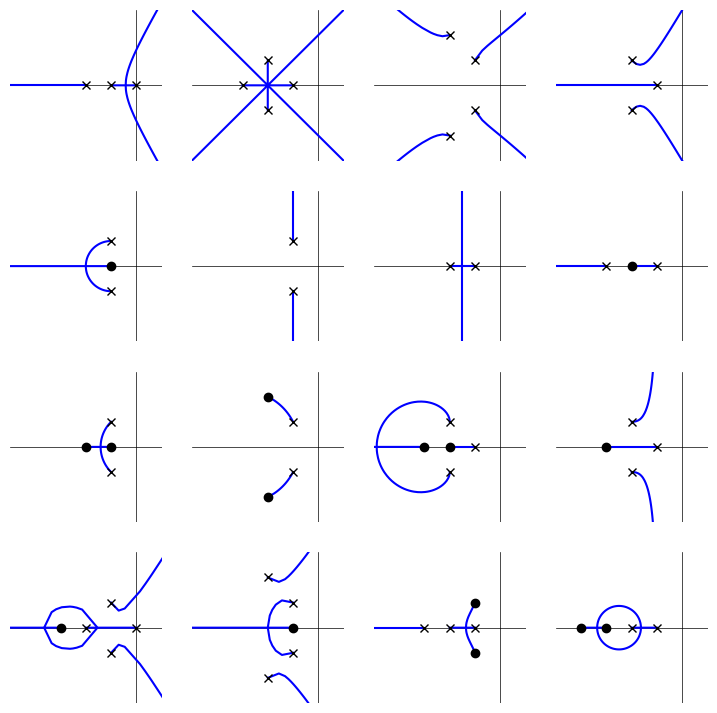

In [2]:
poles = [[np.array([]) for i in range(4)] for i in range(4)]
zeros = [[np.array([]) for i in range(4)] for i in range(4)]

poles[0][0] = np.array([-2, -1, 0])
#zeros[0][0] = []

poles[0][1] = np.array([-2-1j, -2+1j, -3, -1])
#zeros[0][1] = []

poles[0][2] = np.array([-1-1j, -1+1j, -2-2j, -2+2j])
#zeros[0][2] = []

poles[0][3] = np.array([-2-1j, -2+1j, -1])
#zeros[0][3] = []

poles[1][0] = np.array([-1-1j, -1+1j])
zeros[1][0] = np.array([-1])

poles[1][1] = np.array([-1-1j, -1+1j])
#zeros[1][1] = []

poles[1][2] = np.array([-1, -2])
#zeros[1][2] = []

poles[1][3] = np.array([-1, -3])
zeros[1][3] = np.array([-2])

poles[2][0] = np.array([-1-1j, -1+1j])
zeros[2][0] = np.array([-1, -2])

poles[2][1] = np.array([-1-1j, -1+1j])
zeros[2][1] = np.array([-2-2j, -2+2j])

poles[2][2] = np.array([-2-1j, -2+1j, -1])
zeros[2][2] = np.array([-2, -3])

poles[2][3] = np.array([-2-1j, -2+1j, -1])
zeros[2][3] = np.array([-3])

poles[3][0] = np.array([-1-1j, -1+1j, 0, -2])
zeros[3][0] = np.array([-3])

poles[3][1] = np.array([-1-1j, -1+1j, -2+2j, -2-2j])
zeros[3][1] = np.array([-1])

poles[3][2] = np.array([-1, -2, -3])
zeros[3][2] = np.array([-1-1j, -1+1j])

poles[3][3] = np.array([-1, -2])
zeros[3][3] = np.array([-3, -4])

fig,ax = plt.subplots(4,4, figsize=(9,9))
for ii in range(4):
    for jj in range(4):
        den = eu.roots_to_polynomial(poles[ii][jj])
        num = eu.roots_to_polynomial(zeros[ii][jj])
        P = ct.tf(num,den)
        cl_poles, K = ct.root_locus(P, plot=False)

        ax[ii,jj].plot([-5,1],[0,0],'k',linewidth=0.5)
        ax[ii,jj].plot([0,0],[-3,3],'k',linewidth=0.5)
        ax[ii,jj].plot(np.real(cl_poles), np.imag(cl_poles), 'b')
        ax[ii,jj].plot(np.real(poles[ii][jj]),np.imag(poles[ii][jj]), 'kx' )
        ax[ii,jj].plot(np.real(zeros[ii][jj]),np.imag(zeros[ii][jj]), 'ko' )
        ax[ii,jj].set_xlim(-5,1)
        ax[ii,jj].set_ylim(-3,3)
        ax[ii,jj].axis('off')
        



# Some interesting observations (for the future)
- Note the effect of placing a zero (in the left-half plane)! A system that could be unstable (for large values of $K$) can be guaranteed to be stable. For example, see the progression from (1,4) -> (3,4) -> (3,3) as more zeros are added to the system. 

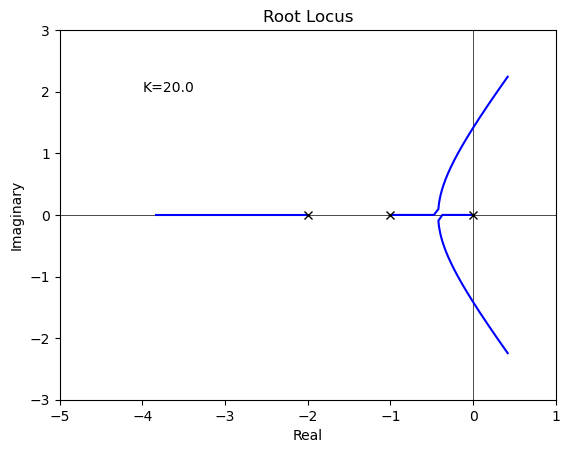

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import control as ct
import enel441_utilities as eu

poles = np.array([-2, -1, 0])
zeros = []

den = eu.roots_to_polynomial(poles)
num = eu.roots_to_polynomial(zeros)

P = ct.tf(num,den)
N = 1000
K_vec = np.linspace(0,20,N)

# Define the meta data for the movie
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Root Locus', artist='Matplotlib',
                comment='visualize closed loop poles moving')
writer = FFMpegWriter(fps=15, metadata=metadata)

# Initialize the movie
fig, ax = plt.subplots(1)
with writer.saving(fig, "root_locus_video.mp4", 100):
    for ii in range(1,N):

        cl_poles, K = ct.root_locus(P, plot=False, kvect=K_vec[0:ii])
        ax.clear()
        ax.plot([-5,1],[0,0],'k',linewidth=0.5)
        ax.plot([0,0],[-3,3],'k',linewidth=0.5)
        ax.plot(np.real(cl_poles), np.imag(cl_poles), 'b')
        ax.plot(np.real(poles),np.imag(poles), 'kx' )
        ax.plot(np.real(zeros),np.imag(zeros), 'ko' )
        ax.set_xlim(-5,1)
        ax.set_ylim(-3,3)
        ax.set_title('Root Locus')
        ax.set_xlabel('Real')
        ax.set_ylabel('Imaginary')
        ann_str = 'K='+str(K_vec[ii])
        ax.annotate(ann_str,(-4,2))
        writer.grab_frame()
       

In [13]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="root_locus_video.mp4" type="video/mp4">
</video></div>""")

# Why is $K$ assumed to be positive?

Consider question 18 in the practice problems. We have a plant $P(s) = \frac{s+4}{s^2+2s+2}$. We want to design a proportional controller that results in a closed loop system with percent overshoot less than 2\% and a peak time that is as fast as possible. 

It is possible to find two controllers that satisfy the requirements: $K=5.868$ and $K=-0.147$. What is the problem with selecting a controller with a negative value?

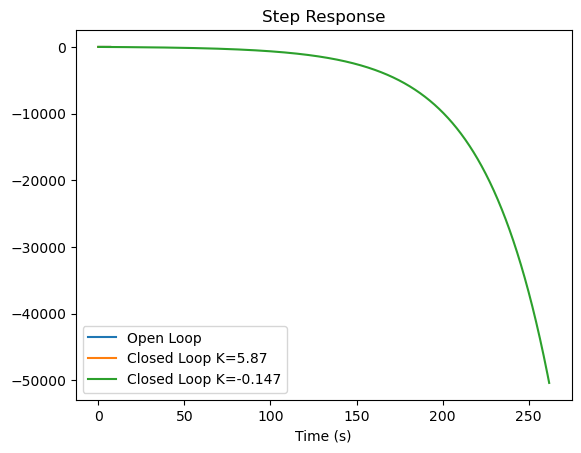

In [8]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

P = ct.tf([1, 4], [1, 2, 2])

K1 = 5.87
K1_tf = ct.tf(K1,1)
T1 = P*K1_tf/(1+P*K1_tf)

K2 = -0.51
K2_tf = ct.tf(K2,1)
T2 = P*K2_tf/(1+P*K2_tf)

t_ol,y_step_ol = ct.step_response(P)
t_cl1,y1_step_cl = ct.step_response(T1)
t_cl2,y2_step_cl = ct.step_response(T2)

fig,ax = plt.subplots(1)
ax.plot(t_ol,y_step_ol, label='Open Loop')
ax.plot(t_cl1,y1_step_cl, label='Closed Loop K=5.87')
ax.plot(t_cl2,y2_step_cl, label='Closed Loop K=-0.147')
ax.set_title('Step Response')
ax.set_xlabel('Time (s)')
ax.legend()


Because of the negative controller, the step response moves in the opposite direction as the step input (a positive step input results in a negative output). 



# We can show that in general $K$ should be positive

Before we start, need to prove a result.

Consider a transfer function 
$$G(s) = \frac{B(s)}{A(s)} = \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}$$
If $G(s)$ is stable, then $a_0 >0$.

Proof:
Express $A$ in terms of its roots (these are the poles of $G(s)$):
$$
\begin{align*}
A(s) = (s+p_1)(s+p_2) \cdots (s+p_{n_a})
\end{align*}
$$

From this expression, it is possible to obtain an expression for $a_0$ in terms of the poles:
$$
\begin{align*}
a_0 = p_1p_2 \cdots p_{n_a}
\end{align*}
$$
Because $G(s)$ is assumed to be positive, all $p_{n_a}$ have positive real part. In addition, all complex poles appear in conjugate pairs. This implies that $a_0$ is positive. 
End of Proof

# Main Result

We want to understand why only considering $K>0$ makes sense. In the following text we will show that under mild assumptions it is reasonable to only consider $K>0$. 

We will make several assumptions:
1. The open-loop system is stable,
2. The closed-loop system is stable,
3. The open-loop system is such that when a positive step input is applied, the steady state output is also positive. 
4. The closed-loop system is such that when a positive step input is applied, the steady state output is also positive. 

For many systems this is reasonable. 

We will use the following notation:
- $r(t)$ is a unit step when we do these calculations.
- $P(s) = \frac{B(s)}{A(s)}$, where 
    - $B(s) = b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}$,
    - $A(s) = a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}$,
    - $n_a \ge n_b$,
    - $a_{n_a} \ne 0$, 
    - $b_{n_b} \ne 0$.

Let's look at the steady state error of the closed-loop system when a step input is applied to the reference input. 

# Step 1.

$$
\begin{align*}
Y(s) &= \frac{P(s)K}{1 + P(s)K} R(s) \\
&= \frac{P(s)K}{1 + P(s)K}\frac{1}{s} \\
&= \frac{P(s)K}{1 + \frac{B(s)}{A(s)}K} \frac{1}{s} \\
&= \frac{B(s)K}{A(s)+ B(s)K}\frac{1}{s} 
\end{align*}
$$

Now find $y(\infty)$:
$$
\begin{align*}
y(\infty) &= \lim_{s \to 0} s Y(s) \\
&= \lim_{s \to 0} s \frac{B(s)K}{A(s)+ B(s)K}\frac{1}{s}  \\
& = \lim_{s \to 0} \frac{B(s)K}{A(s)+ B(s)K} \\
&= \lim_{s \to 0} \frac{K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a} + K(b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b})} \\
&= \frac{Kb_0}{a_0 + Kb_0}
\end{align*}
$$

Because the open loop system is assumed to be stable, it follows that $a_0>0$. 

Next, we will use the assumptions to show that $b_0$ also is positive. Consider the steady state value of the open-loop response to a unit step input:
$$
\begin{align*}
Y_{ol}(s) &= P(s)U(s) \\
&= \frac{B(s)}{A(s)}\frac{1}{s} \\
&= \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}\frac{1}{s}
\end{align*}
$$
Now find $y_{ol}(\infty)$:
$$
\begin{align*}
y_{ol}(\infty) &= \lim_{s \to 0} s Y(s) \\
&= \lim_{s \to 0} s \frac{b_0 + b_1s + b_2s^2 + \cdots + b_{n_b}s^{n_b}}{a_0 + a_1s + a_2s^2 + \cdots + a_{n_a-1}s^{n_a-1} + s^{n_a}}\frac{1}{s} \\
&= \frac{b_0}{a_0}
\end{align*}
$$
We already know that $a_0 >0$. By the second assumption, $y_{ol}(\infty)$ is positive, thus it follows that $b_0$ must be positive. 

# Step 2.

The closed-loop steady state value to a unit step is equal to 
$$
\begin{align*}
y(\infty )= \frac{Kb_0}{a_0 + Kb_0},
\end{align*}
$$
where $a_0$ and $b_0$ are both positive. By the fourth assumption, $y(\infty)$ is positive. In order to determine the range of $K$ for which $y_{\infty}$ is positive, it is helpful to consider the positivity/negativity of the numerator and denominator separately. 
- Case 1: $K<-\frac{a_0}{b_0}$. The numerator is negative, and the denominator is negative, thus $y_{\infty}$ is positive. 
- Case 2: $-\frac{a_0}{b_0} < K < 0$. The numerator is negative, and the denominator is positive, thus $y_{\infty}$ is negative. 
- Case 3: $K > 0$. The numerator is positive, and the denominator is positive, thus $y_{\infty}$ is positive. 

Thus, the values of $K$ of Cases 1 and 3, lead to systems for which the assumptions hold. 

# Step 3.
In this step we will use the stability assumptions to rule out the range of $K<-\frac{a_0}{b_0}$. 

# Look at another Example System - Active Suspension for a Car

![Car suspension](car_suspension.png "Car suspension")
source: https://auto.howstuffworks.com/car-suspension.htm


![Car suspension diagram](car-suspension-diagram.png "Car suspension diagram")


![Car suspension free body diagram](car-suspension-free-body-diagram.png "Car suspension free body diagram")

where,
- $F_u$ is the force applied by the active suspension
- $F_g$ is the force due to gravity
- $F_s$ is the force due to the spring
- $F_d$ is the force due to the damper
- $x_c$ is vertical position of car
- $x_g$ is vertical position of the ground

Force due to drag:
$$
\begin{align*}
F_d = k_d v_c 
\end{align*}
$$
where 
- $k_d$ is drag coefficient,
- $v_c$ is vertical speed of the car. 


# In Class Activity! 

Determine the transfer function from $F$ to $x$

Sum forces:
$$
\begin{align*}
\sum_k F_k &= ma \\
-F_s - F_d - F_g + F_u &= ma_c \\
-k(x_c-x_g) - b(\frac{dx_c}{dt}-\frac{dx_g}{dt}) - mg + F_u = m\frac{d^2x_c}{dt^2}
\end{align*}
$$
Take Laplace transform of both sides:
$$
\begin{align*}
-k(X_c(s) - X_g(s)) - b(sX_c(s) - sX_g(s)) - mg + F_u(s) = ms^2X_c(s) \\
 + X_g(s) (k + bs) - mg + F_u(s) = X_c(s) ( k + bs + ms^2) \\
X_c(s) = \frac{k+bs}{k + bs + ms^2}X_g(s) + \frac{1}{k + bs + ms^2}F_u(s) - \frac{mg}{k + bs + ms^2}
\end{align*}
$$
Let's take a pause here. For a linear system, if we double in the input, we will get double the output. Is our current expression for $X_c$ linear with respect to the inputs $F_u$ and $X_g$?

Let's double both inputs and determine the output. Let $\tilde{X}_c$ denote the output with doubled inputs:
$$
\begin{align*}
\tilde{X}_c(s) &= \frac{k+bs}{k + bs + ms^2}2 X_g(s) + \frac{1}{k + bs + ms^2}2 F_u(s) - \frac{mg}{k + bs + ms^2} \\
&= 2X_c(s) + \frac{mg}{k + bs + ms^2}
\end{align*}
$$

We did not get double the output (i.e. we don't have $\tilde{X}_c = 2X_c$)! The term due to gravity is getting in the way! 



# Attempt #2. Write the equations around the equilibrium point (this will absorb the term due to gravity).

At equilibrium:
$$
\begin{align*}
x_c &= x_{eq}, \\
\frac{dx_c}{dt} &= 0, \\
\frac{d^2x_c}{dt^2} &= 0, \\
x_g &= 0, \\
\frac{dx_g}{dt} &= 0, \\
F_u &= 0
\end{align*}
$$
Substitute these values into the original expression, and solve for $x_{eq}$:
$$
\begin{align*}
-kx_{eq} - mg &= 0 \\
x_{eq} &= -\frac{mg}{k}
\end{align*}
$$
Now we can express $x_c$ is terms of a relative change from its equilibrium position:
$$
\begin{align*}
x_c = x_{eq} + x_{\Delta}
\end{align*}
$$

Note that the following equalities hold:
$$
\begin{align*}
\frac{d x_c}{dt} &= \frac{d x_{\Delta}}{dt} \\
\frac{d^2 x_c}{dt^2} &= \frac{d^2 x_{\Delta}}{dt^2} 
\end{align*}
$$

Now substitute $x_c = x_{eq} + x_{\Delta}$ into the original differential equation:
$$
\begin{align*}
-k(x_{eq} + x_{\Delta}-x_g) - b(\frac{dx_{\Delta}}{dt}-\frac{dx_g}{dt}) - mg + F_u = m\frac{d^2x_{\Delta}}{dt^2}
\end{align*}
$$

Recall that $x_{eq} = -\frac{mg}{k}$. Substitute this into the equation:
$$
\begin{align*}
-k(x_{\Delta}-x_g) - b(\frac{dx_{\Delta}}{dt}-\frac{dx_g}{dt}) + F_u = m\frac{d^2x_{\Delta}}{dt^2}
\end{align*}
$$

Take Laplace transform of both sides, and gather terms:
$$
\begin{align*}
(b s + k)X_g(s) + F(s) &= (ms^2 + bs + k) X_{\Delta}(s) \\
X_{\Delta}(s) &= \frac{(b s + k)}{(ms^2 + bs + k)}X_g(s) + \frac{1}{(ms^2 + bs + k)}F(s)
\end{align*}
$$

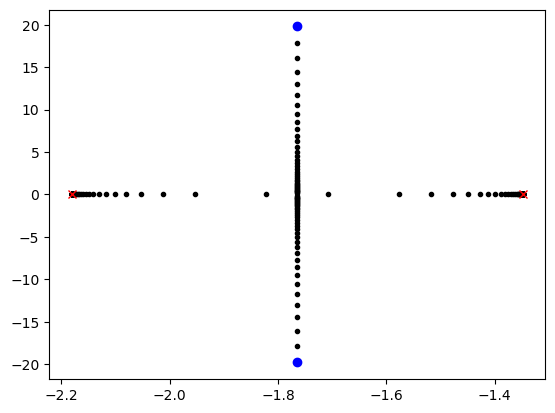

In [3]:
import control as ct
import numpy as np
import enel441_utilities as eu
import math
import scipy as sp
import matplotlib.pyplot as plt

b = 9
k = 7.5
m = 2.55

k_range = np.logspace(-6,3,100)
fig,ax = eu.enel441_root_locus(np.array([1]),np.array([m, b, k]),k_range) 
plt.show()


# What can we observe?

- System is stable for all $K$
- For small $K$, poles are real (near red cross)
- For large $K$, poles are complex (near blue dot)

# Suppose that we use a pneumatic actuator that is relatively slow.

Let the model for the actuator be $\frac{1}{s+0.5}$. What does the frequency response look like? 

So now the applied force is equal to $F(s) = \frac{F_c(s)}{s+0.5}$, where $F(s)$ is the output force of the actuator, and $F_c(s)$ is the commanded force. 

Plug this into our model:
$$
\begin{align*}
X_{\Delta}(s) &= \frac{(b s + k)}{(ms^2 + bs + k)}X_g(s) + \frac{1}{(s+0.5)(ms^2 + bs + k)}F_c(s)
\end{align*}
$$


# In Class Activity!

Look at Root Locus for the new model. What do you see?

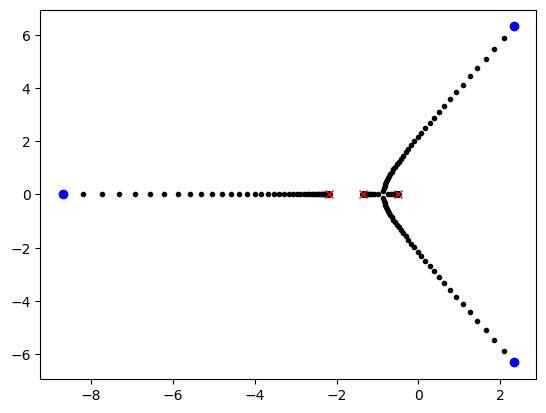

In [6]:
b = 9
k = 7.5
m = 2.55
a = 0.5

k_range = np.logspace(-6,3,100)
fig,ax = eu.enel441_root_locus(np.array([1]),np.array([m, b+0.5*m, k+0.5*b, 0.5*k]),k_range) 
plt.show()